## ML Zoompcamp Trees Learning Assignment

In [1]:
# import necessary libraries

import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
carli_housing = None
try:
    csv_url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"
    carli_housing = pd.read_csv(csv_url)
    carli_housing = carli_housing
except IOError as e:
    print(e)
carli_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
carli_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
carli_housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
# carli_housing = carli_housing.copy()

In [6]:
carli_housing.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [7]:
carli_housing = carli_housing.loc[(carli_housing.ocean_proximity == '<1H OCEAN') | (carli_housing.ocean_proximity == 'INLAND')]

In [8]:
carli_housing.ocean_proximity.unique()

array(['<1H OCEAN', 'INLAND'], dtype=object)

In [9]:
carli_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN


In [10]:
df_carli = carli_housing.copy()
df_carli = df_carli.reset_index(drop=True)

In [11]:
df_carli.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
1,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
2,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN


In [12]:
df_carli.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [13]:
df_carli.fillna(0, inplace=True)

In [14]:
# df_carli.isnull().sum()

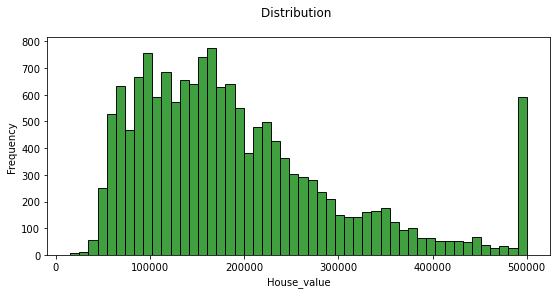

In [15]:
plt.figure(figsize=(9,4))

sns.histplot(df_carli.median_house_value, bins=50, color='green')
plt.ylabel('Frequency')
plt.xlabel('House_value')
plt.title('Distribution \n')
plt.show()

#plot shows a long tail

In [16]:
#applying log transformation
df_carli.median_house_value = np.log1p(df_carli.median_house_value.values)

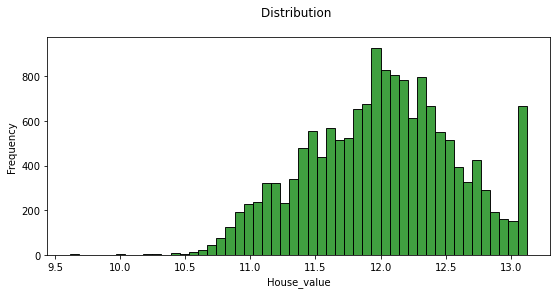

In [17]:
plt.figure(figsize=(9,4))

sns.histplot(df_carli.median_house_value, bins=50, color='green')
plt.ylabel('Frequency')
plt.xlabel('House_value')
plt.title('Distribution \n')

plt.show()

#plot shows a long tail

In [18]:
#split the data
from sklearn.model_selection import train_test_split

data_full_train, data_test = train_test_split(df_carli, test_size=0.2, random_state=1)
data_train, data_val = train_test_split(data_full_train, test_size=0.25, random_state=1)

In [19]:
len(data_train), len(data_val), len(data_test)

(9411, 3138, 3138)

In [20]:
# data_train = data_train.reset_index(drop=True)
# data_val = data_val.reset_index(drop=True)
# data_test = data_test.reset_index(drop=True)

y_train = data_train.median_house_value.values
y_val = data_val.median_house_value.values
y_test = data_test.median_house_value.values

# y_train = data_train.median_house_value.astype('int').values
# y_val = data_val.median_house_value.astype('int').values
# y_test = data_test.median_house_value.astype('int').values

del data_train['median_house_value']
del data_val['median_house_value']
del data_test['median_house_value']

In [21]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.metrics import roc_auc_score

In [22]:
dv = DictVectorizer(sparse=True)

In [23]:
train_dict = data_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = data_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

### Question 1

In [24]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [25]:
print(export_text(dt, feature_names=list(dv.get_feature_names())))

|--- ocean_proximity=<1H OCEAN <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity=<1H OCEAN >  0.50
|   |--- value: [12.30]



##### Ans: ocean_proximity

### Question 2

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [27]:
# def rmse(y, y_pred):
#     error = y_pred - y
#     mse = (error ** 2).mean()
#     return np.sqrt(mse)

In [28]:
model = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
rmse = mean_squared_error(y_val, y_pred) ** 0.5
print(f'{rmse:.3f}') 

0.245


In [29]:
##### Ans = 0.245

### Question 3

In [30]:
# n = np.arange(10, 200, 10)

for n in range(10, 201, 10):
    model = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred) ** 0.5
    print(f'for {n}, rmse is {rmse:.3f}')

for 10, rmse is 0.245
for 20, rmse is 0.239
for 30, rmse is 0.237
for 40, rmse is 0.236
for 50, rmse is 0.235
for 60, rmse is 0.235
for 70, rmse is 0.235
for 80, rmse is 0.235
for 90, rmse is 0.235
for 100, rmse is 0.234
for 110, rmse is 0.234
for 120, rmse is 0.234
for 130, rmse is 0.234
for 140, rmse is 0.234
for 150, rmse is 0.234
for 160, rmse is 0.234
for 170, rmse is 0.233
for 180, rmse is 0.234
for 190, rmse is 0.234
for 200, rmse is 0.234


##### Ans: 160

### Question 4

In [31]:
for depth in [10,15,20,25]:
    print(f'For max-depth {depth}')
    for n in range(10, 201, 10):
        model = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1, max_depth = depth)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        rmse = mean_squared_error(y_val, y_pred) ** 0.5
        print(f'{n} has rmse of {rmse:.3f}')
    print('--------------- \n')

For max-depth 10
10 has rmse of 0.251
20 has rmse of 0.248
30 has rmse of 0.246
40 has rmse of 0.245
50 has rmse of 0.246
60 has rmse of 0.245
70 has rmse of 0.245
80 has rmse of 0.246
90 has rmse of 0.246
100 has rmse of 0.245
110 has rmse of 0.245
120 has rmse of 0.245
130 has rmse of 0.245
140 has rmse of 0.245
150 has rmse of 0.245
160 has rmse of 0.245
170 has rmse of 0.244
180 has rmse of 0.245
190 has rmse of 0.245
200 has rmse of 0.245
--------------- 

For max-depth 15
10 has rmse of 0.246
20 has rmse of 0.240
30 has rmse of 0.238
40 has rmse of 0.236
50 has rmse of 0.236
60 has rmse of 0.236
70 has rmse of 0.236
80 has rmse of 0.236
90 has rmse of 0.235
100 has rmse of 0.235
110 has rmse of 0.235
120 has rmse of 0.235
130 has rmse of 0.235
140 has rmse of 0.235
150 has rmse of 0.235
160 has rmse of 0.234
170 has rmse of 0.234
180 has rmse of 0.235
190 has rmse of 0.235
200 has rmse of 0.235
--------------- 

For max-depth 20
10 has rmse of 0.245
20 has rmse of 0.239
30 has rm

##### Ans: max_depth is 25

### Question 5

In [32]:
model = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

In [33]:
dv.get_feature_names()

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'population',
 'total_bedrooms',
 'total_rooms']

In [34]:
model.feature_importances_

array([0.0151361 , 0.03031726, 0.10200703, 0.08624381, 0.33561113,
       0.29247297, 0.07380644, 0.02713606, 0.01585222, 0.02141699])

In [35]:
data = {'Feature': dv.get_feature_names(), 'Scores': model.feature_importances_}

df_feat = pd.DataFrame(data)
df_feat.sort_values('Scores', ascending=False)

,Feature,Scores
4,median_income,0.335611
5,ocean_proximity=<1H OCEAN,0.292473
2,latitude,0.102007
3,longitude,0.086244
6,ocean_proximity=INLAND,0.073806
1,housing_median_age,0.030317
7,population,0.027136
9,total_rooms,0.021417
8,total_bedrooms,0.015852
0,households,0.015136


###### Ans: median_income

### Question 6

In [36]:
import xgboost as xgb

In [37]:
# replace
feat_names = []
for db in dv.get_feature_names():
    db = str(db).replace('=', '').replace('<', '')
    feat_names.append(db)

In [38]:
feat_names

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity1H OCEAN',
 'ocean_proximityINLAND',
 'population',
 'total_bedrooms',
 'total_rooms']

In [39]:
features = feat_names
dtrain = xgb.DMatrix(X_train, label = y_train, feature_names = features)
dval = xgb.DMatrix(X_val, label = y_val, feature_names = features)
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [40]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)


rmse = mean_squared_error(y_pred,y_val) ** 0.5

print('\n')
print(f'eta of 0.3 gives: {rmse:.3f} rmse value')

[0]	train-rmse:8.07362	val-rmse:8.07348
[5]	train-rmse:1.38983	val-rmse:1.38852
[10]	train-rmse:0.33195	val-rmse:0.34802
[15]	train-rmse:0.22197	val-rmse:0.25614
[20]	train-rmse:0.20036	val-rmse:0.24508
[25]	train-rmse:0.18991	val-rmse:0.24021
[30]	train-rmse:0.18204	val-rmse:0.23833
[35]	train-rmse:0.17091	val-rmse:0.23452
[40]	train-rmse:0.16422	val-rmse:0.23379
[45]	train-rmse:0.15756	val-rmse:0.23302
[50]	train-rmse:0.15210	val-rmse:0.23262
[55]	train-rmse:0.14633	val-rmse:0.23167
[60]	train-rmse:0.14218	val-rmse:0.23160
[65]	train-rmse:0.13898	val-rmse:0.23169
[70]	train-rmse:0.13471	val-rmse:0.23108
[75]	train-rmse:0.13072	val-rmse:0.23036
[80]	train-rmse:0.12835	val-rmse:0.23045
[85]	train-rmse:0.12534	val-rmse:0.23010
[90]	train-rmse:0.12174	val-rmse:0.22957
[95]	train-rmse:0.11894	val-rmse:0.22906
[100]	train-rmse:0.11596	val-rmse:0.22902
[105]	train-rmse:0.11314	val-rmse:0.22887
[110]	train-rmse:0.11077	val-rmse:0.22912
[115]	train-rmse:0.10856	val-rmse:0.22926
[120]	train-rm

In [41]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)


rmse = mean_squared_error(y_pred,y_val) ** 0.5

print('\n')
print(f'eta of 0.1 gives: {rmse:.3f} value')


[0]	train-rmse:10.37456	val-rmse:10.37544
[5]	train-rmse:6.13433	val-rmse:6.13236
[10]	train-rmse:3.63299	val-rmse:3.62939
[15]	train-rmse:2.15901	val-rmse:2.15616
[20]	train-rmse:1.29412	val-rmse:1.29329
[25]	train-rmse:0.78993	val-rmse:0.79341
[30]	train-rmse:0.50217	val-rmse:0.51148
[35]	train-rmse:0.34590	val-rmse:0.36370
[40]	train-rmse:0.26743	val-rmse:0.29345
[45]	train-rmse:0.23015	val-rmse:0.26316
[50]	train-rmse:0.21121	val-rmse:0.24925
[55]	train-rmse:0.20246	val-rmse:0.24352
[60]	train-rmse:0.19692	val-rmse:0.24081
[65]	train-rmse:0.19120	val-rmse:0.23867
[70]	train-rmse:0.18715	val-rmse:0.23708
[75]	train-rmse:0.18364	val-rmse:0.23546
[80]	train-rmse:0.17941	val-rmse:0.23424
[85]	train-rmse:0.17620	val-rmse:0.23306
[90]	train-rmse:0.17320	val-rmse:0.23231
[95]	train-rmse:0.17056	val-rmse:0.23128
[100]	train-rmse:0.16834	val-rmse:0.23047
[105]	train-rmse:0.16508	val-rmse:0.22921
[110]	train-rmse:0.16305	val-rmse:0.22892
[115]	train-rmse:0.16019	val-rmse:0.22818
[120]	train-

##### Answer: Both give equal value